<a href="https://colab.research.google.com/github/mohammadsanatabassum/labs-and-projects-on-aiml-/blob/main/Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 3: CLASSIFICATION-1
LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

Section 1: Implementing KNN


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):

        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])


    return Counter(targets).most_common(1)[0][0]

In [5]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [6]:


def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

In [8]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

Section 1.1 - Iris Dataset

In [9]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

In [16]:

predictions = k_nearest_neighbor(X_train, y_train, X_test, 5)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 98.33333333333333 %


In [17]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 98.33333333333333 %


Section 1.2: Weighted NN

In [18]:
import numpy as np
from collections import Counter

def knn_with_distances(data, query_point, k):
    """
    Find the k-nearest neighbors of a query point and return their distances.

    Parameters:
        data: List of tuples [(x1, y1), (x2, y2), ...], where x is the feature vector and y is the label.
        query_point: The point to classify (feature vector).
        k: Number of nearest neighbors to find.

    Returns:
        List of tuples [(distance, label), ...] sorted by distance.
    """
    distances = []

    # Calculate the distance from the query_point to each point in the dataset.
    for features, label in data:
        distance = np.linalg.norm(np.array(features) - np.array(query_point))
        distances.append((distance, label))

    # Sort distances in ascending order and take the k-nearest points.
    sorted_distances = sorted(distances, key=lambda x: x[0])

    return sorted_distances[:k]

# Example usage:
data = [
    ([1, 2], 'A'),
    ([2, 3], 'A'),
    ([3, 4], 'B'),
    ([5, 5], 'B')
]
query_point = [3, 3]
k = 2

result = knn_with_distances(data, query_point, k)
print("K-Nearest Neighbors and their distances:", result)


K-Nearest Neighbors and their distances: [(1.0, 'A'), (1.0, 'B')]


Section 2: Visualizing Data

In [19]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

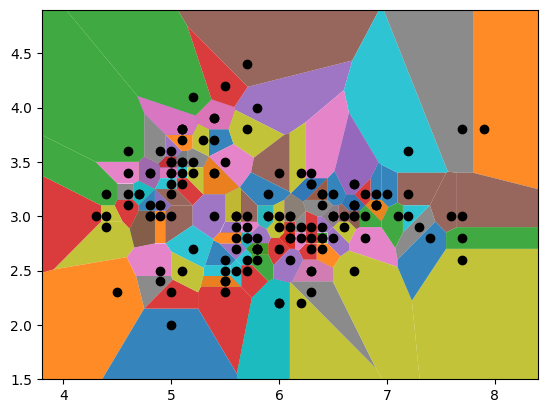

In [22]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.9)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.5, vor.max_bound[0] + 0.5)
plt.ylim(vor.min_bound[1] - 0.5, vor.max_bound[1] + 0.5)

plt.show()

Section 2.3: Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,21,0,0,21
1,0,18,0,18
2,0,1,20,21
All,21,19,20,60


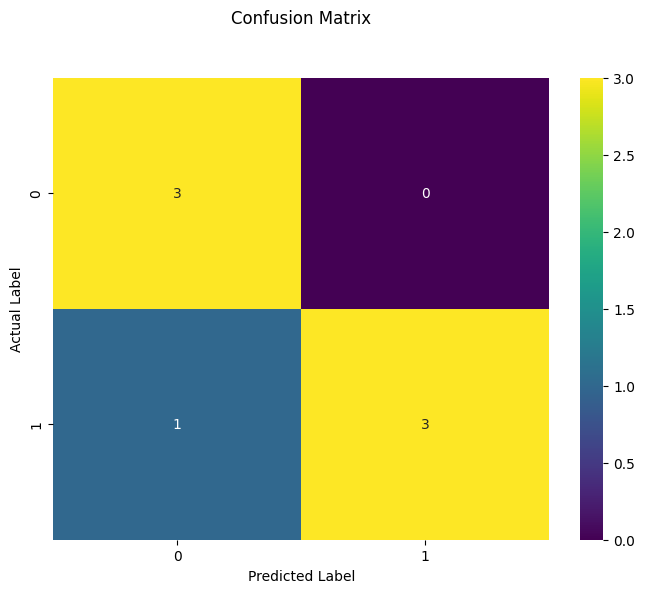

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Example of y_test and predictions (replace these with your actual data)
y_test = [1, 0, 1, 1, 0, 1, 0]
predictions = [1, 0, 1, 0, 0, 1, 0]

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Section 2.4: Classification Report

In [28]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



Car Evaluation Dataset

In [45]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [46]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [47]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


In [54]:

# Print the classification report
class_report = classification_report(y_test, predictions, target_names=le.classes_)
print("\nClassification Report:\n")
print(class_report)





Classification Report:

              precision    recall  f1-score   support

         acc       0.77      0.78      0.77        72
        good       0.75      0.40      0.52        15
       unacc       0.94      0.99      0.96       242
       vgood       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



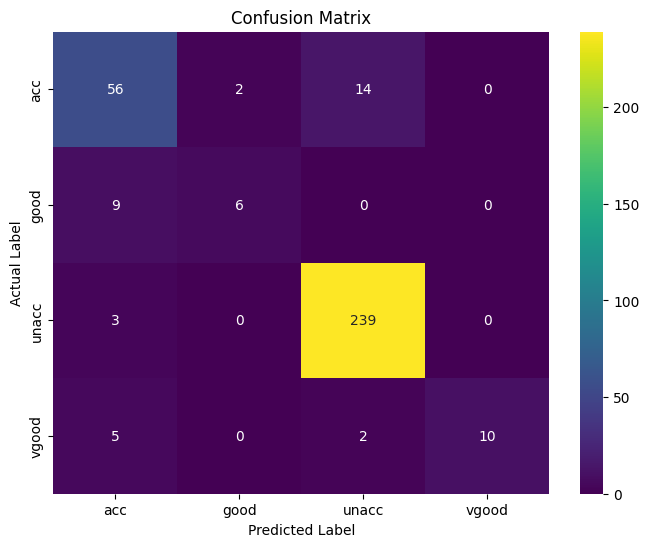

In [52]:

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)

# Use Seaborn to create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="viridis", fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



    In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.
    What do you think could be the drawbacks of using KNN ?




In the K-Nearest Neighbors (KNN) algorithm, the weights parameter controls how much influence each neighbor has on the prediction. Here's a comparison of the two settings:

    Uniform Weights (weights='uniform'):
        In this case, each of the K neighbors has an equal contribution to the decision-making process.
        All neighbors contribute the same weight, regardless of their distance to the query point.
        The classification or regression outcome is determined by the majority label or average of the labels of the nearest neighbors.

    Distance Weights (weights='distance'):
        Here, neighbors closer to the query point have a larger influence on the prediction. The contribution of each neighbor is inversely proportional to its distance.
        Neighbors that are farther away have less impact on the classification or regression result, as their weight is smaller.
        This method often improves accuracy, as closer points are generally more relevant.

Drawbacks of Using KNN:

    Computationally Expensive:
        KNN is a lazy learner, meaning it doesn't learn a model during training but rather stores the entire dataset and computes the prediction during testing. This can be slow, especially for large datasets, as the algorithm needs to calculate the distance between the query point and every point in the training set.

    Sensitive to Irrelevant Features:
        KNN can be heavily impacted by irrelevant or redundant features. Since it calculates distances based on all features, irrelevant features can distort the distance metric, making it harder to find meaningful neighbors.

    Curse of Dimensionality:
        As the number of features (dimensions) increases, the distance between points in the dataset increases, making it harder for the algorithm to distinguish between close neighbors. This can degrade the performance of KNN, especially with high-dimensional data.

    Choice of K:
        Selecting an optimal value for K is challenging. A small K can make the model sensitive to noise (overfitting), while a large K can lead to underfitting and less sensitive predictions.

    Imbalance in Data:
        KNN can struggle with imbalanced datasets because the algorithm is based on counting the frequency of different classes in the neighbors. If one class is overrepresented, it can dominate the prediction, especially with small K values.

    Memory Intensive:
        Since KNN stores the entire dataset, it can be memory-intensive, which could be problematic for large-scale datasets.

    Distance Metric Sensitivity:
        The algorithm's performance can be highly sensitive to the choice of distance metric (e.g., Euclidean, Manhattan, etc.), which may need to be carefully tuned for different types of data.